<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Денис! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

<div class="alert alert-info">
<font size="5"><b>Ответ студента</b></font>

Сделано 
    
</div>

# Исследование продаж видеоигр в мире до 2016 года

В нашем распоряжении исторические данные из открытых источников о продажах видеоигр для всех платформ в Северной Америке, Европе, Японии и остальном мире до 2016 года. Они включают в себя информацию о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В рамках исследования нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">

Совет:     
    





- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html), это на будущее 



## Изучим общую информацию

In [149]:
data = pd.read_csv('/datasets/games.csv')
pd.set_option('display.max_columns', None)
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


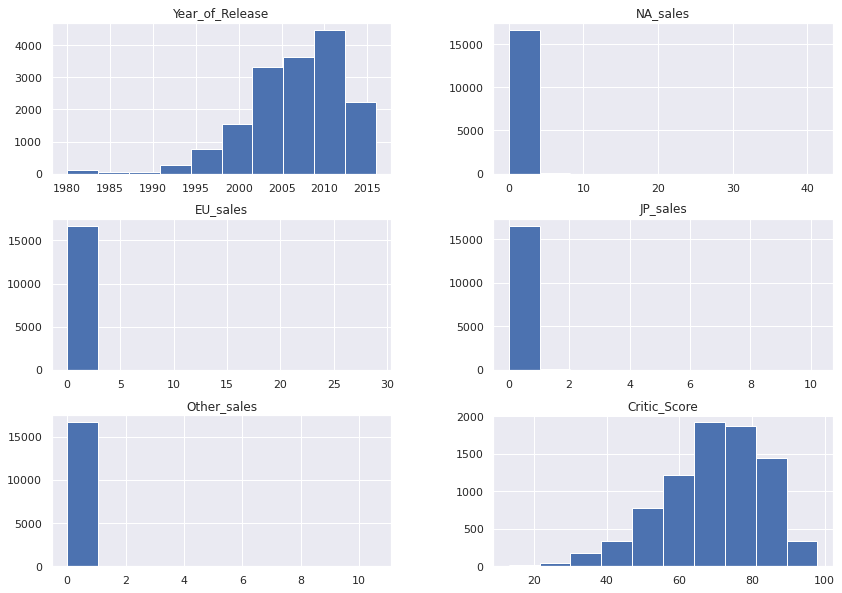

In [151]:
data.hist(figsize=(14, 10));

In [152]:
# Проверим распределение данных в столбцах с численными типами
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [153]:
# Проверим количество пропусках в столбцах
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Пропусков в столбцах Name, Year_of_Release и Genre не очень много, они могли быть вызваны как человеческим фактором (забыли внести данные), так и технологическим фактором и особенностями данных (игра выпускалась в разные годы для разных платформ).

В столбцах Critic_Score, User_Score и Rating встречается уже значительно больше пропусков. Исходя из логики и временного периода данных, напрашиваются гипотезы о том, что эти пропуски могут принадлежать к самым старым выпущенным играм и платформам, которые уже несколько десятилетий как не используются, либо о том, что некоторые игры не имеют рейтингов ESRB из-за того, что эта организация появилась позже, чем были выпущены эти игры. Также можно предположить, что не все игры, выпущенные в различных регионах, например, Японии, получали рейтинг.
То есть данные пропуски могут иметь определённое значение. В столбце Rating предлагается заменить пропуски на 'unknown'

In [154]:
# Проверим наличие полных явных дубликатов
data.duplicated().sum()

0

Была изучена общая информация о предоставленных данных.
Названия столбцов следует перевести в нижний регистр.
В столбце User_Score следует изменить тип данных с object на численный.
В столбцах с данными о продажах наблюдается очень значительная скошенность вправо. Видим, что значения первого, второго и третьего квартиля, а также медианы, являются очень низкими и находятся достаточно близко друг к другу. В то время как максимальные значения продаж исчисляются десятками миллионов. Можно предположить, что некоторая небольшая часть от всех игр демонстрирует самый высокий уровень продаж. Аналогичное предположение можно сделать касательно платформ. Учитывая большое количество нулевых значений, можно предположить, что для некоторых платформ игры выпускались лишь в течение нескольких лет. 
Пропуски обнаружены в шести столбцах, в трёх столбцах ('Name', 'Year_of_Release' и 'Genre') их число незначительно, поэтому избавимся от строк с этими пропусками.
Полных дубликатов в данных нет.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:



info(), describe() получено первичное представление о данных. 



  
План дальнейших действий составлен.   


<div class="alert alert-warning">


Совет: 





- .sample вместо .head (выводит первые строки), ведь если данные каким то образом упорядоченны, то шансы увидеть что то разнообразное через .sample чуть выше чем через .head (или .tail - выводит последние строки)     



<div class="alert alert-info">
<font size="5"><b>Ответ студента</b></font>

Спасибо за отличный совет! Как раз думал об этом, когда писал в этом проекте метод .head()
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


## Подготовка данных

### Приведем названия столбцов к нижнему регистру

In [155]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [156]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Все верно, использование .lower предпочтительно в данном случаи, (ведь нас не просят переименовать а только привести к строчному виду) так мы автоматизируем работу, впереди у нас датасеты с сотнями столбцами которые нам переделывать через .rename() будет затруднительно. 



### Преобразуем типы данных

In [157]:
# Приведём столбец с годами к типу 'int', т.к. дробные значения в данном случае не имеют смысла
data['year_of_release'] = data['year_of_release'].astype('Int64', errors='ignore')

In [158]:
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64

In [159]:
# Заменим значения "tbd" на NaN, т.к. предполагается, что это отсутствующее значение
data['user_score'] = data['user_score'].replace('tbd', np.nan)

# Изменим тип данных с object на float, т.к. данные числовые
data['user_score'] = data['user_score'].astype(float)


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Погугуглено - выяснено -  сделано. 

Верно что обошлось без удаления, или попыток заменить на "среднюю по больнице" итп.   tbd по сути это Nan
    
    




</div>






In [160]:
data['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

### Обработка пропусков

In [161]:
# Полностью удалим строки с пропусками в столбцах 'name', 'year_of_release', 'genre', т.к. их доля незначительная
data = data.dropna(subset=['name', 'year_of_release', 'genre'])
data = data.reset_index(drop=True)


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Обоснование и решение удалить year_of_release, genre и name верное. Методы применены оптимально. Молодец
    
    

<div class="alert alert-warning">


Совет: 




- Решение верное, но перед удалением стоит посмотреть на записи  может на удаленные пару строк приходится по 100 млн. продаж


In [162]:
# Пропуски в столбце 'rating' заполним значением 'unknown'
data['rating'] = data['rating'].fillna('unknown')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Если посмотреть в интернете, что такое рейтинг ESRB, то узнаем что он только для Северной Америки, а в Японии CERO к примеру. То есть пропуск это не ошибка, не технический сбой, это тоже информация которую нужно привести в удобный вид. Всё сделал правильно










### Создадим столбец с суммарными продажами по всем регионам

In [163]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 

Твой код отработал норамально, но есть более "пандовский" вариант 
```
df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
```
где axis = 1 означает что мы считаем по горизонтали, axis = 0 по вертикали.

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


Что можно было сделать еще?

Заняться неявными дубликатами в рейтингах и названиях игр. Данные стали бы чуть чуть чище. 


На примере рейтингов это могло выглядеть так: 

1. Используем value_counts() к rating и обнаруживаем небольшое число у K-A и EC. 
2. Гуглим и обнаруживаем что это старая версия E (можно продолжить выяснять).. 
3. Делаем замены. Такой вариант работы с неявными дубликатами. 

С именами сложней, тут бы помогли регулярные выражения. 


Это тоже предобработка данных.
</div>



 </div>



<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Оставить пропуски в rating без изменений - это не ошибка. Но в дальнейшем тебе следовало обратить внимание на это при анализе игр по регионам (ведь при группировке по rating с помощью pivot_table или group_by, по nan агрегированные данные не считаются, как результат очень много информации мы потеряли). К сожалению этого сделано не было. Подумай, (можешь погуглить о рейтинге ESRB) чем могут быть вызваны пропуски и на что стоит их заменить, чтобы было информативно и не выбивалось из других значений этого столбца. 
</div>












<div class="alert alert-info">
<font size="5"><b>Ответ студента</b></font>

Чуть выше заменил пропуски на значение 'unknown'. Пояснение вписал после десятой ячейки с кодом
    
</div>


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Я не смог найти ответа на вопрос задания "Опишите причины, которые могли привести к пропускам". Важно описывать причину пропущенных значений, чтобы заказчик мог понимать, каким образом ему следует исправить сервис в целях недопущения возникновения подобных "багов" в дальнейшем.     



</div>




<div class="alert alert-info">
<font size="5"><b>Ответ студента</b></font>

Добавил пояснение выше, после шестой ячейки с кодом
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Такие какие причины вполне возможны




</div>


```
Названия всех столбцов были приведены к нижнему регистру.
Столбец с годом выпуска (year_of_release) был приведён к типу int.
В столбце с пользовательскими оценками (user_score) значения "tbd" были заменены на NaN. Также был изменён тип данных с
object на float, т.к. данные в столбце user_score числовые.
Были удалены строки с пропусками в столбцах name, year_of_release и genre. Количество таких строк незначительно.
Был создан столбец total_sales, который включает в себя продажи во всех регионах. То есть total sales = na_sales + eu_sales + jp_sales + other_sales
```

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Промежуточный вывод всегда в тему




</div>


## Исследовательский анализ данных

### Проверим, сколько игр выпускалось в каждый год

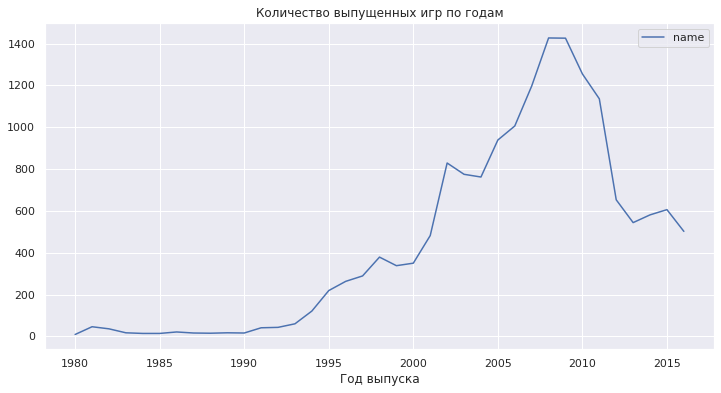

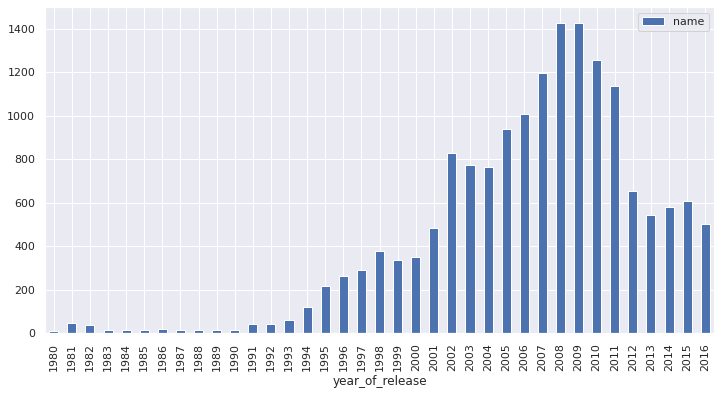

In [164]:
games_by_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12, 6))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
sns.lineplot(data=games_by_year);
games_by_year.plot(kind='bar', figsize=(12, 6));

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Успех:    


График построен хорошо надписи все присутствуют, figsize  подобран.  Почему это может быть важно?! Графики первое что бросается в глаза, а первое впечатление порой определяющее.    
    
    





В данных представлен выпуск игр с 1980 по 2016 годы. Видно, что с 1980 по 1991 годы количество выпускаемых игр было очень
низким. Затем с 1993 года начался резкий рост, который продолжался по 2009 год включительно. Пиковые значения выпущенных игр
приходятся на 2008 и 2009 годы с показателями около 1400 игр в год. Далее наблюдается спад до 2012 года. Затем в период с 2012 по 2016 годы количество выпускаемых игр менялось не так значительно, показатели составляют около 500 игр в год.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

да, 80-90-е выглядят анахронизмом тут



</div>


### Проверим, как менялись продажи по платформам 

In [165]:
# Построим сводную таблицу с уровнем продаж по платформам за каждый год. В каждой колонке данные по отдельной платформе
sales_by_year_and_platform = data.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc=sum)

In [166]:
sales_by_year_and_platform

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,45.01,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Можно убрать nan, наложить heatmap - будет красивей
</div>


In [167]:
# Создадим список с названиями 10 самых продаваемых платформ
top10_platforms = sales_by_year_and_platform.sum().sort_values(ascending=False).head(10).index

</div>


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: 
    


Здорово что автоматом вытащен топ платформы, к сожалению многие вручную набивают

Альтернатива, использовать
    
    .nlargest(10, 'total_sales')

<div>





In [168]:
# Возьмём срез сводной таблицы только с топ 10 платформами
top10_sales_by_year_and_platform = sales_by_year_and_platform.loc[:,top10_platforms]

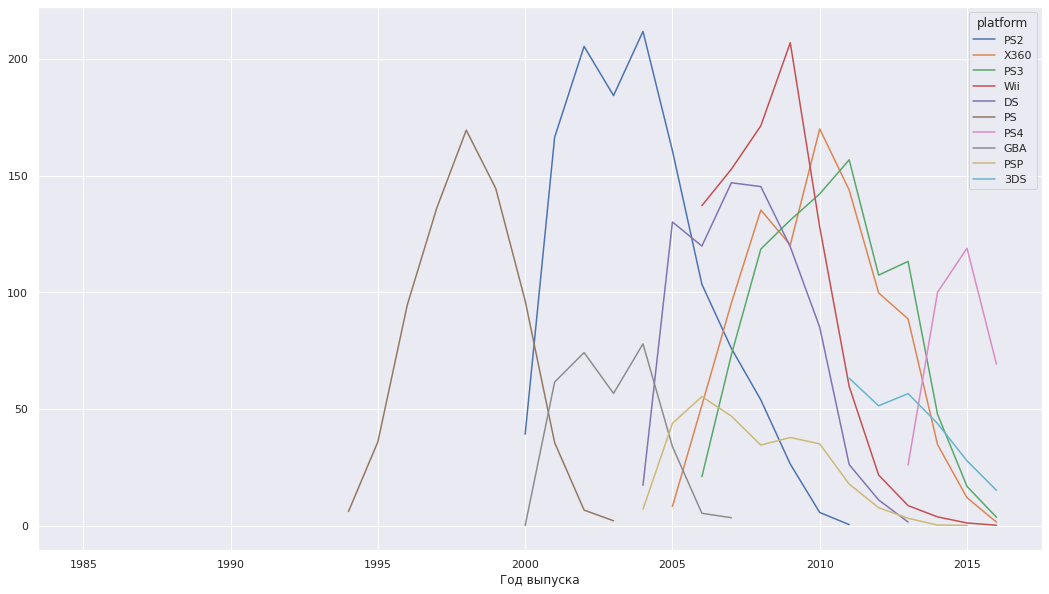

In [169]:
# Построим график с уровнем продаж по годам для топ 10
top10_sales_by_year_and_platform.plot(xlabel='Год выпуска',figsize=(18, 10));

In [170]:
# Вычислим среднее количество лет, в течение которых для каждой платформы продавались игры
sales_by_year_and_platform.count().median()

7.0

Самыми продаваемыми платформами за всё время являются PS2, Wii, X360 и PS. В пиковые годы под эти платформы было продано от 160 до 210 миллионов копий игр в год.

В среднем платформы существовали на рынке в течение 7 лет от их появления до ухода с рынка.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:



Информативный график, и вывод о длине цикла верный. 

    


### Проверим, как менялись продажи по платформам за актуальный период

Будем считать актуальным периодом срез данных за последние три года в датасете, то есть с 2014 по 2016 годы включительно

In [171]:
# Создадим переменную data_new с данными с 2014 по 2016 годы включительно
data_new = data.query('year_of_release >= 2014').reset_index(drop=True)


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Для правильного выбора нужно было увязать требование проекта - прогноз на 2017 года, данные о жизненном цикле платформ, особенность индустрии игры, и учесть тренд. Твой выбор верный, молодец.

</div>

In [172]:
data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [173]:
# Создадим сводную таблицу с продажами за каждый год за период 2014 - 2016 гг. по каждой платформе
new_sales = data_new.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc=sum)
new_sales

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


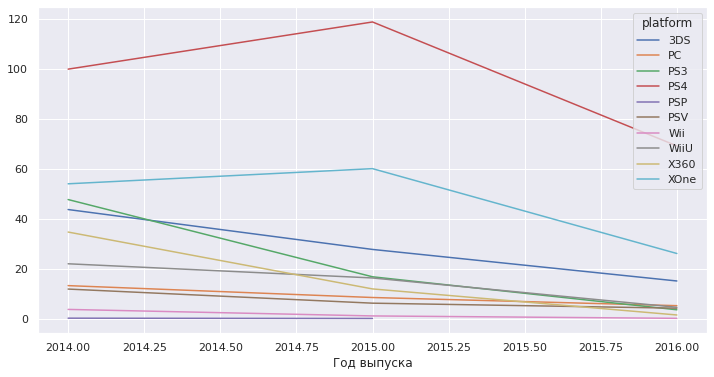

In [174]:
new_sales.plot(xlabel='Год выпуска', figsize=(12, 6));

В период с 2014 по 2016 годы на рынке продавались игры для 10 платформ. PS4 являлся абсолютным лидером по продажам с максимальным значением в 120 миллионов проданных копий в 2015 году. Второе место занимал XOne c максимальным значением в 60 миллионов проданных копий в 2015 году.

В целом можно сказать, с 2014 по 2016 годы наблюдается стабильный спад в продажах во всех платформах кроме PS4 и XOne. У этих платформ был рост продаж до 2015 года, но затем тоже начался очень сильный спад. Тем не менее, они сохранили значительный отрыв от своих конкурентов, поэтому можем их считать потенциально наиболее прибыльными.



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Посмотрены продажи, динамика и найдены платформы которые действительно стоит рассмотреть для 2017 года. 





<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:




- К выбранным платформам вопросов нет. Но стоит выбрать еще, доведя число перспективных до 5-6. Да, продажи находятся на спаде, общая ситуация на рынке не утешительна, тем не менее всегда можно выбрать "лучших среди худших".





### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

Создадим отдельные датафреймы для платформ PS4, XOne и 3DS 

In [175]:
# Датафрейм с данными по PS4
PS4 = data_new[data_new['platform'] == 'PS4']

In [176]:
# Датафрейм с данными по XOne
XOne = data_new[data_new['platform'] == 'XOne']

In [177]:
# Датафрейм с данными по 3DS
DS3 = data_new[data_new['platform'] == '3DS']

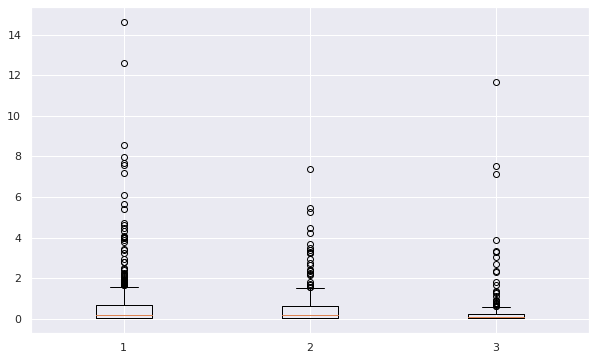

In [178]:
# Построим ящики с усами
plt.figure(figsize=(10, 6))
plt.xticks()
plt.boxplot([PS4['total_sales'], XOne['total_sales'], DS3['total_sales']]);

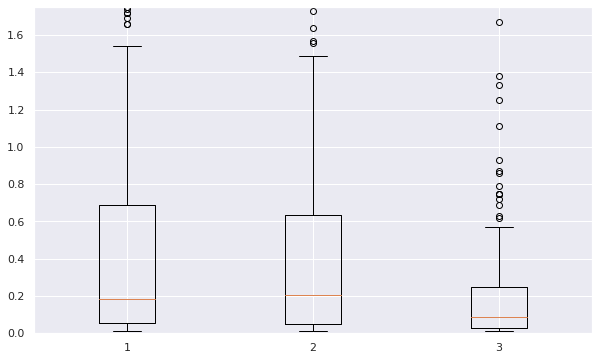

In [179]:
# Построим ящики с усами без выбросов
plt.figure(figsize=(10, 6))
plt.ylim(0, 1.75)
plt.boxplot([PS4['total_sales'], XOne['total_sales'], DS3['total_sales']]);




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Построить два boxplot это верный выбор. По одному можем оценить медианы и квартили по платформам, по другому оценивать важные для анализа выбросы - супермега популярные игры. 
    





Совет: 

почему не используешь seaborn? Он строит красивей и  код лаконичней:


    plt.figure(figsize=(13, 8))
    (sns.boxplot(data = df, y = 'total_sales', x='Платформы')
        .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

    plt.show()



На первом графике видно, что в каждой из трёх самых популярных платформ (PS4, XOne и 3DS) выбросов очень много, и они очень сильно удалены даже от значения в 1.5 IQR вверх от третьего квартиля. Это говорит о том, что есть некоторая небольшая часть игр, которые становятся бестселлерами и имеют значительно превосходящие продажи, в то время как большая часть игр имеют намного более низкие объёмы продаж.

На втором графике были рассмотрены распределения продаж без выбросов. Можем отметить, что значения первого и второго (медианы) квартилей практически совпадают у платформ PS4 и XOne. Различие в значениях третьих квартилей так же незначительное, с небольшим перевесом у PS4. У платформы 3DS значения каждого квартиля значительно ниже, а также выбросы начинаются с гораздо более низких значений. 


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
    
Хорошо подчеркнуто, что именно мега популярные игры и вытягивают средние, в то время как основная масса игр имеют весьма небольшие продажи. Это и называется хорошая работа с boxplot. И если ты играешь в игры,  это вполне соответствует реальности - стоит выйти новой игре и  игры прошлого сезона уже никто не покупает



<div class="alert alert-warning">


Совет: 


Чтобы лучше понять, что отображает боксплот, рекомендую со следующим материалом ознакомиться

https://stepik.org/lesson/9294/step/4?unit=1827

И вот рисуночек:


![Ящик с усами](https://ucarecdn.com/c476e686-fb7b-4e8a-b9d3-54d3b461bb44/)



### Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков на примере PS4 и нескольких топовых платформ

#### Корреляции для PS4

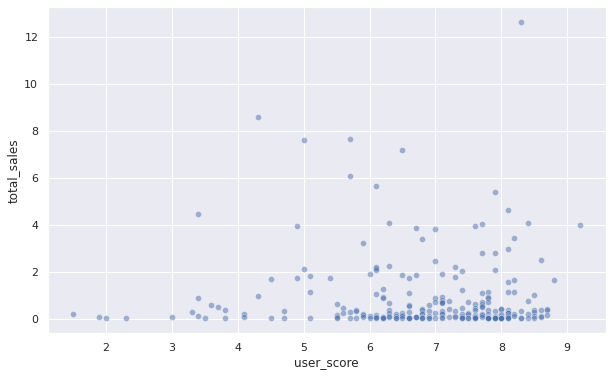

In [180]:
# Построим диаграмму рассеяния по столбцам с оценками пользователей и общими продажами

sns.set(rc={'figure.figsize':(10, 6)})
sns.scatterplot(data=PS4, x='user_score', y='total_sales', alpha=0.5);

In [181]:
# Рассчитаем коэффициент корреляции между оценками пользователей и продажами

PS4['user_score'].corr(PS4['total_sales'])

-0.040131589472697356

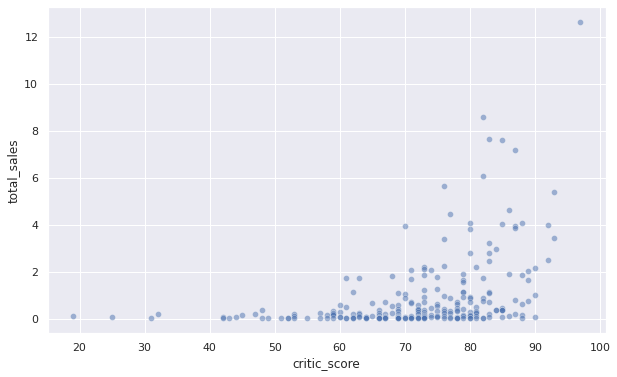

In [182]:
# Построим диаграмму рассеяния по столбцам с оценками критиков и общими продажами

sns.set(rc={'figure.figsize':(10, 6)})
sns.scatterplot(data=PS4, x='critic_score', y='total_sales', alpha=0.5);

In [183]:
# Рассчитаем коэффициент корреляции между оценками критиков и продажами

PS4['critic_score'].corr(PS4['total_sales'])

0.40266141068104083

Для платформы PS4 коэффициент корреляции между оценками пользователей и уровнем продаж близок к нулю, он равен -0.04. То есть связь отсутствует, оценки пользователей нельзя использовать для предсказания уровня продаж.

Коэффициент корреляции между оценками критиков и уровнем продаж равен 0.4. В данном случае можно сделать вывод о наличии средней положительной корреляции для платформы PS4.

#### Корреляции для нескольких топовых платформ

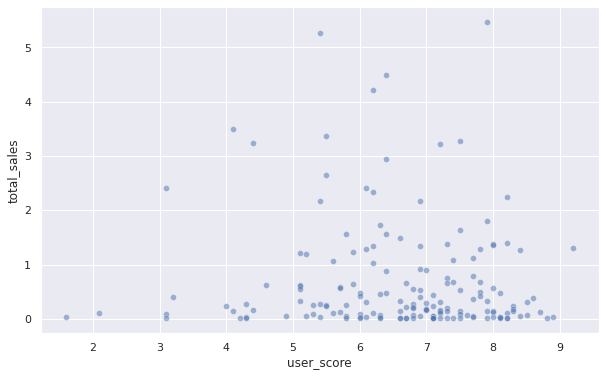

Коэффициент корреляции для платформы XOne равен: -0.0703839280647581




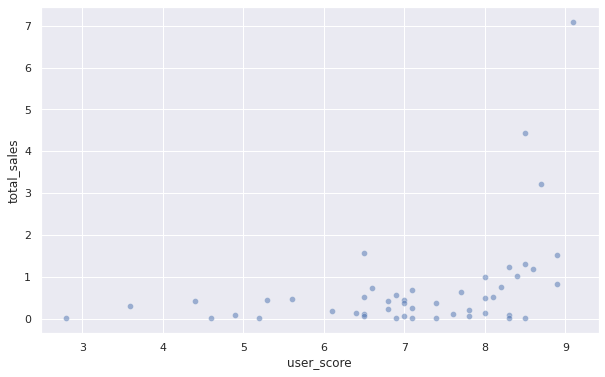

Коэффициент корреляции для платформы WiiU равен: 0.40792645792170773




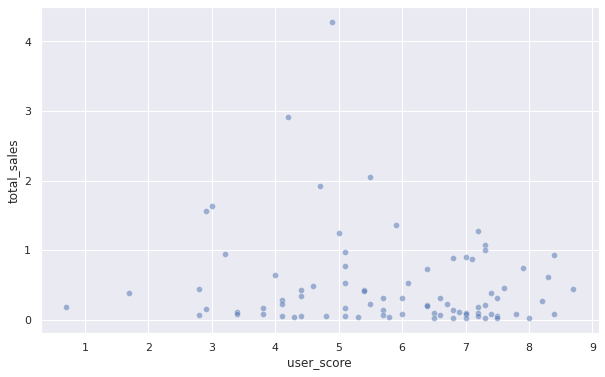

Коэффициент корреляции для платформы X360 равен: -0.138444570945665




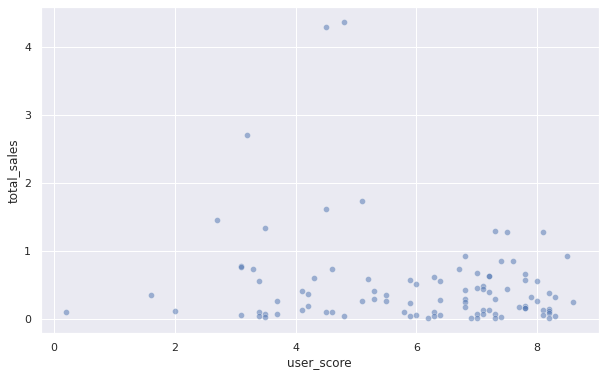

Коэффициент корреляции для платформы PS3 равен: -0.16676141347662118




In [184]:
# Рассмотрим корреляции ещё по четырём самым популярным платформам. Уберём Wii, т.к. по этой платформе очень мало значений
top_platforms = data_new.groupby('platform')['total_sales'].median().sort_values(ascending=False).index[:6].drop(['PS4', 'Wii'])

for platform in top_platforms:
    temp_platform_data = data_new[data_new['platform'] == platform]
    temp_platform_data['user_score'].corr(temp_platform_data['total_sales'])
    sns.set(rc={'figure.figsize':(10, 6)})
    sns.scatterplot(data=temp_platform_data, x='user_score', y='total_sales', alpha=0.5);
    plt.show()
    print(f'Коэффициент корреляции для платформы {platform} равен:', temp_platform_data['user_score'].corr(temp_platform_data['total_sales']), end=3*'\n')

По трём самым популярным платформам кроме PS4 коэффициенты корреляции также близки к нулю. Однако у японской WiiU наблюдается другая картина - коэффициент корреляции составляет 0.41, что отображает среднюю положительную связь.

На основе имеющихся данных можно предположить, что в западном мире влияние пользовательских оценок практически отсутствует, в то время как в Японии оно вероятно имеет определённое значение

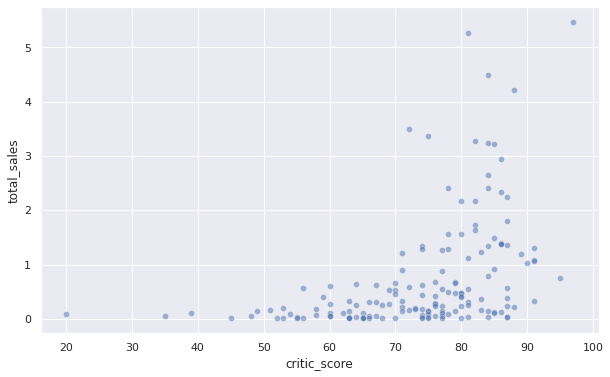

Коэффициент корреляции для платформы XOne равен: 0.42867694370333226




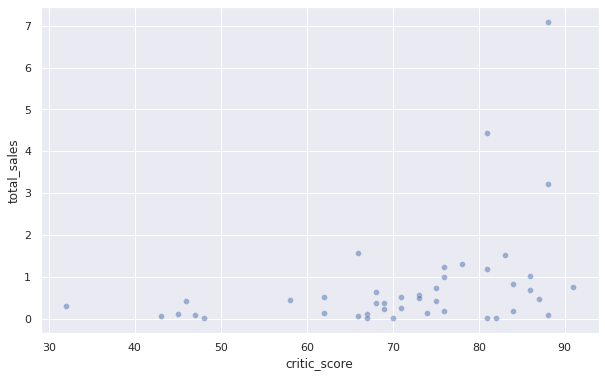

Коэффициент корреляции для платформы WiiU равен: 0.370201412480884




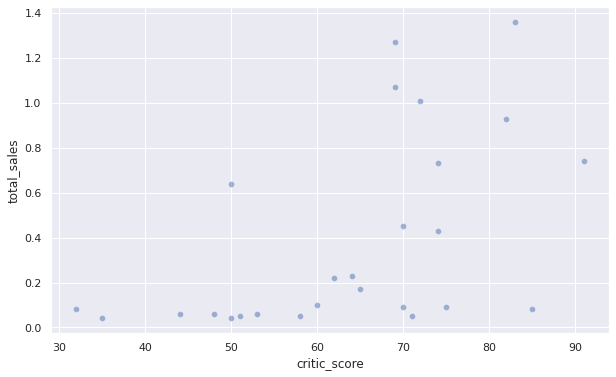

Коэффициент корреляции для платформы X360 равен: 0.5257228356581523




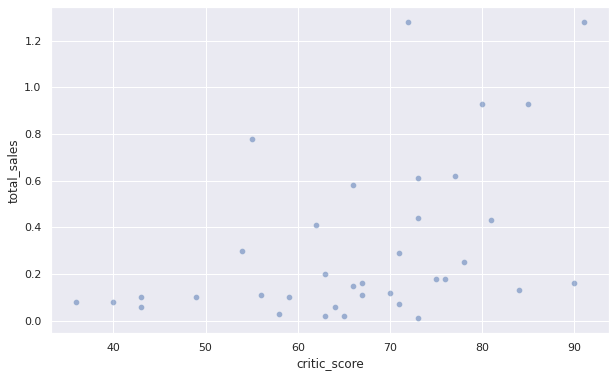

Коэффициент корреляции для платформы PS3 равен: 0.44657460493190704




In [185]:
# Рассмотрим корреляции ещё по четырём самым популярным платформам. Уберём Wii, т.к. по этой платформе очень мало значений
for platform in top_platforms:
    temp_platform_data = data_new[data_new['platform'] == platform]
    temp_platform_data['critic_score'].corr(temp_platform_data['total_sales'])
    sns.set(rc={'figure.figsize':(10, 6)})
    sns.scatterplot(data=temp_platform_data, x='critic_score', y='total_sales', alpha=0.5);
    plt.show()
    print(f'Коэффициент корреляции для платформы {platform} равен:', temp_platform_data['critic_score'].corr(temp_platform_data['total_sales']), end=3*'\n')

В отличие от оценок пользователей, оценки критиков в каждой из топовых платформ имеют устойчивую среднюю корреляцию. Для платформы X360 коэффициент равен 0.53. В то время как у японской Wii он составляет 0.37, что является самым низким показателем среди представленных, но всё равно отражает некоторую связь между оценками критиков и продажами. Можно предположить, что для прогнозирования продаж лучше использовать оценки критиков как один из факторов

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:




+ отсутствие корреляции между отзывами клиентов и продажами подчеркнута правильно 

+ графики оформлены аккуратно 

+ метод .corr() использован




<div class="alert alert-warning">


Совет: 


- Когда действие повторяется два и более раз, стоит подумать о цикле или функции или функции с циклом



Вопросики, пожеланию можешь ответить )



- Можешь предположить почему корреляция продаж с отзывами критиков выше, чем с отзывами пользователей?


- Можешь вспомнить, только какой тип связи может выявить корреляция Пирсона?


- Можно ли утверждать о отсутствии связи при близких к нулю показателях корреляции?


- Можно ли утверждать о причинно-следственной связях при высоких значениях корреляции?


- Можешь используя графики выявить нелинейные связи?




</div>







<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:





- Задание звучит "Соотнесите выводы с продажами игр на других платформах.", так полученные выводы выглядят "весомей" и убедительней. Стоит посчитать корреляцию  по 4-5 платформам.   
Советую использовать цикл - напиши код, который делает срез по нужной платформе, затем считает корреляцию, и строит графики. А затем запусти это в цикле, подавая разные значения платформ. Это будет хорошим шагом вперед, на пути улучшения кода с точки зрения компактности и читабельности.




</div>

<div class="alert alert-info">
<font size="5"><b>Ответ студента</b></font>

Посчитал корреляции ещё по 4 платформам, вписал комментарии к полученным результатам
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


Правильно что использовал цикл

</div>


### Рассмотрим общее распределение игр по жанрам

In [186]:
# Узнаем количество представленных жанров
len(data_new['genre'].unique())

12

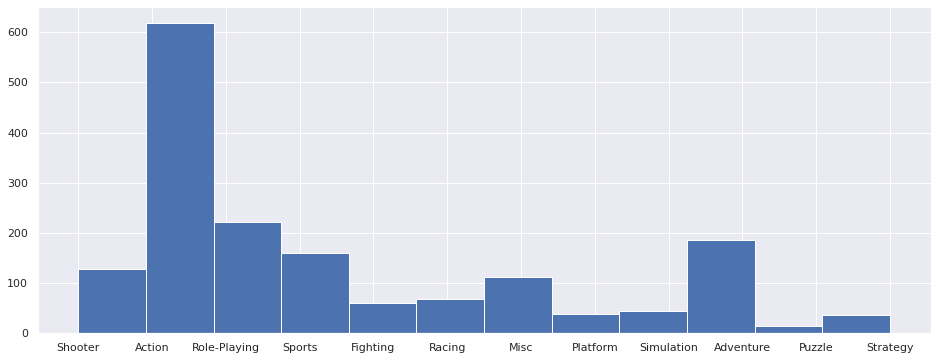

In [187]:
# Проверим график с распределением выпущенных игр по жанрам
data_new['genre'].hist(figsize=(16, 6), bins=12);

In [188]:
# Продажи в среднем по жанрам
data_new.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: total_sales, dtype: float64

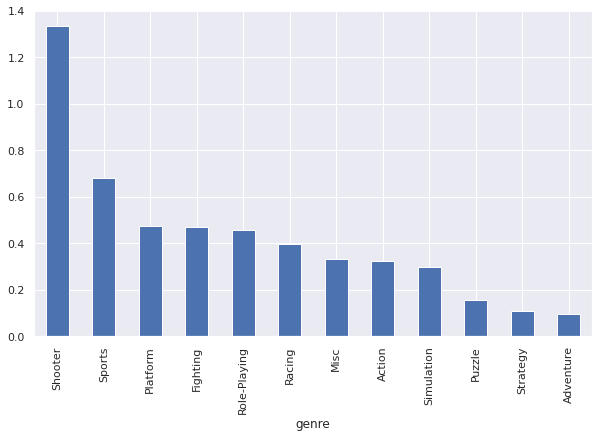

In [189]:
data_new.groupby('genre')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar');

In [190]:
# Медианные продажи по жанрам
data_new.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

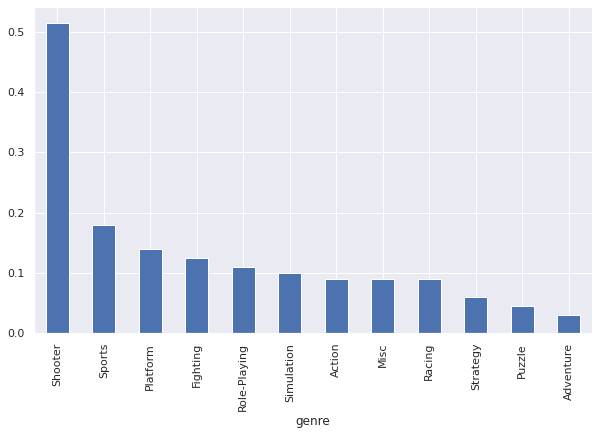

In [191]:
data_new.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar');

Больше всего игр было выпущено в жанре Action, более 600 игр за 3 года. Этот жанр является абсолютным лидером, все последующие жанры имеют значительно более низкие показатели. Второе место занимает жанр Role-Playing с чуть более 200-ми выпущенными играми, на третьем месте жанр Adventure с около 190 выпущенными играми.

Абсолютным лидером по прибыльными является жанр Shooter. Далее идут Sports, Platform и Fighting
Strategy, Puzzle и Adventure являются наименее прибыльными жанрами.
Оба вывода справедливы как при подсчёте средних, так и при подсчёте медианных значений.



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Правильно что использованы два вида показателей (абсолютный и относительный), чтобы сделать вывод.

Замечу, что медианные (средние) для анализа важней, потому что на какие на какие множители можно разложить суммарный результат? На средние продажи игр в этом жанре умноженные на количество игр в этом жанре. То есть за высокими продажами какого-то жанра могут скрываться множество мелких игры, с низкими продажами. А за низкими суммарными продажами в жанре может скрываться небольшое число игры, но каждая из которых имеет высокие доходы.

Небольшой вопрос "на подумать", как должен выглядеть boxplot (помимо высокой медианы) идеального жанра, чтобы минимизировать риск неудачного выбора игры?

</div>

<b>Вывод по разделу:</b>
Был проведён исследовательский анализ данных.
В данных представлен выпуск игр с 1980 по 2016 годы. С 1980 по 1991 годы количество выпускаемых игр было очень
низким. Затем с 1993 года начался резкий рост, который продолжался по 2009 год включительно. Пиковые значения выпущенных игр
приходятся на 2008 и 2009 годы с показателями около 1400 игр в год. Далее наблюдается спад до 2012 года. Затем в период с 2012 по 2016 годы количество выпускаемых игр менялось не так значительно, показатели составляют около 500 игр в год.

Самыми продаваемыми платформами за всё время являются PS2, Wii, X360 и PS. В пиковые годы под эти платформы было продано от 160 до 210 миллионов копий игр в год.

В среднем платформы существовали на рынке в течение 7 лет от их появления до ухода с рынка.

Далее был взят срез за наиболее актуальный период в данных - 2014-2016 годы.

В период с 2014 по 2016 годы на рынке продавались игры для 10 платформ. PS4 являлся абсолютным лидером по продажам с максимальным значением в 120 миллионов проданных копий в 2015 году. Второе место занимал XOne c максимальным значением в 60 миллионов проданных копий в 2015 году.

В целом можно сказать, с 2014 по 2016 годы наблюдается стабильный спад в продажах во всех платформах кроме PS4 и XOne. У этих платформ был рост продаж до 2015 года, но затем тоже начался очень сильный спад. Тем не менее, они сохранили значительный отрыв от своих конкурентов, поэтому можем их считать потенциально наиболее прибыльными.

При построении графика "ящик с усами" было обнаружено, что в каждой из трёх самых популярных платформ (PS4, XOne и 3DS) в объёме продаж очень много выбросов, и они очень сильно удалены даже от значения в 1.5 IQR вверх от третьего квартиля. Это говорит о том, что есть некоторая небольшая часть игр, которые становятся бестселлерами и имеют значительно превосходящие продажи, в то время как большая часть игр имеют намного более низкие объёмы продаж.

На втором графике были рассмотрены распределения продаж без выбросов. Было отмечено, что значения первого и второго (медианы) квартилей практически совпадают у платформ PS4 и XOne. Различие в значениях третьих квартилей так же незначительное, с небольшим перевесом у PS4. У платформы 3DS значения каждого квартиля значительно ниже, а также выбросы начинаются с гораздо более низких значений.

Далее были рассчитаны коэффициенты корреляции между оценками пользователей и уровнем продаж и оценками критиков и уровнем продаж для платформы PS4. В первом случае значение коэффициента оказалось близко к нулю, оно равно -0.04. Был сделан вывод, что связь отсутствует, оценки пользователей нельзя использовать для предсказания уровня продаж.
Коэффициент корреляции между оценками критиков и уровнем продаж равен 0.4. В данном случае можно говорить о наличии средней положительной корреляции.

По трём самым популярным платформам кроме PS4 коэффициенты корреляции также оказались близки к нулю. Однако у японской WiiU наблюдается другая картина - коэффициент корреляции составляет 0.41, что отображает среднюю положительную связь.

На основе имеющихся данных можно предположить, что в западном мире влияние пользовательских оценок практически отсутствует, в то время как в Японии оно вероятно имеет определённое значение.

В отличие от оценок пользователей, оценки критиков в каждой из топовых платформ имеют устойчивую среднюю корреляцию. Для платформы X360 коэффициент равен 0.53. В то время как у японской Wii он составляет 0.37, что является самым низким показателем среди представленных, но всё равно отражает некоторую связь между оценками критиков и продажами. Можно предположить, что для прогнозирования продаж лучше использовать оценки критиков как один из факторов.

Затем было рассмотрено общее распределение игр по жанрам. Больше всего игр было выпущено в жанре Action, более 600 игр за 3 года. Этот жанр является абсолютным лидером, все последующие жанры имеют значительно более низкие показатели. Второе место занимает жанр Role-Playing с чуть более 200-ми выпущенными играми, на третьем месте жанр Adventure с около 190 выпущенными играми.

Далее были рассчитаны медианные и средние продажи для каждого жанра. В обоих случаях картина достаточно схожая. Абсолютным лидером по прибыльными является жанр Shooter. Далее идут Sports, Platform и Fighting
Strategy, Puzzle и Adventure являются наименее прибыльными жанрами.

## Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

In [192]:
def portrait_by_region_criteria(data, region, criteria):
    some_stats = data.pivot_table(index=criteria, \
                                  values=[region, 'name'], \
                                  aggfunc={region:'sum', 'name': 'count'}).\
sort_values(region, ascending=False).head()
    some_stats.columns = [region, 'number_of_titles']
    display(some_stats)
    some_stats.plot(kind='pie', y=region, title=f'Top 5 {criteria}s for {region[:2].upper()}', figsize=(8,8))

,na_sales,number_of_titles
platform,,
PS4,98.61,376
XOne,81.27,228
X360,28.30,111
3DS,22.64,212
PS3,22.05,219


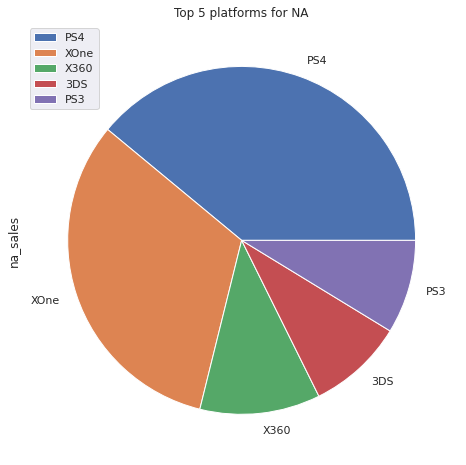

,eu_sales,number_of_titles
platform,,
PS4,130.04,376
XOne,46.25,228
PS3,25.54,219
PC,17.97,151
3DS,16.12,212


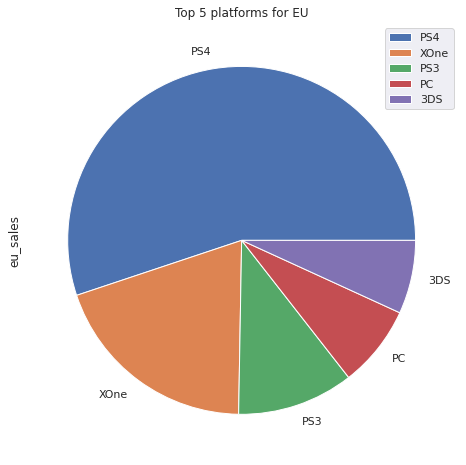

,jp_sales,number_of_titles
platform,,
3DS,44.24,212
PS4,15.02,376
PSV,14.54,295
PS3,11.22,219
WiiU,7.31,73


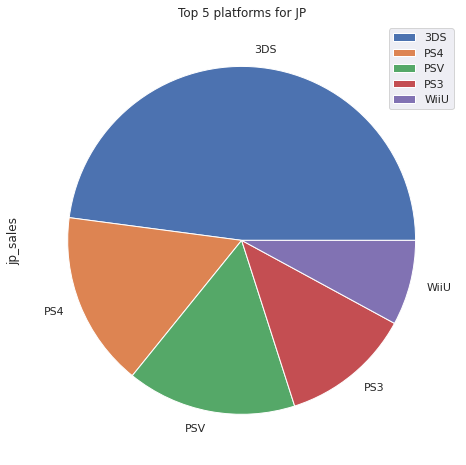

In [193]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    portrait_by_region_criteria(data_new, region, 'platform')
    plt.show()



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 понятная таблица и график. 

Техничная реализация - циклы, самописная функция - все по фэн шую )




</div>

Самыми популярными платформами в европейском и североамериканском регионах является PS4, причём в Северной Америке количество проданных игр на PS4 не так сильно опережает продажи для XOne в процентном соотношении. В то время как в Европе  продажи игр для PS4 занимают больше половиныот всех продаж среди топ-5 платформ региона.

В Японии самой популярной платформой является 3DS, она составляет почти половину от всех продаж для топ-5 платформ. Далее следуют PS4, PSV и PS3 с сопоставимыми долями рынка. В данном регионе XOne не входит в топ 5 по продажам.

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).

,na_sales,number_of_titles
genre,,
Shooter,79.02,128
Action,72.53,619
Sports,46.13,161
Role-Playing,33.47,221
Misc,15.05,113


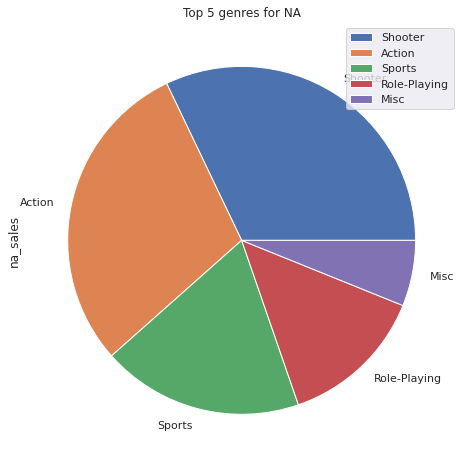

,eu_sales,number_of_titles
genre,,
Action,74.68,619
Shooter,65.52,128
Sports,45.73,161
Role-Playing,28.17,221
Racing,14.13,69


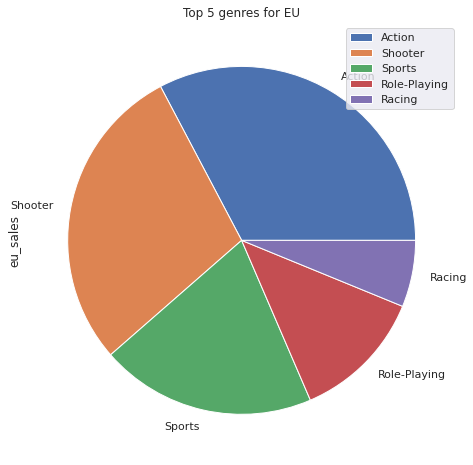

,jp_sales,number_of_titles
genre,,
Role-Playing,31.16,221
Action,29.58,619
Fighting,6.37,60
Misc,5.61,113
Shooter,4.87,128


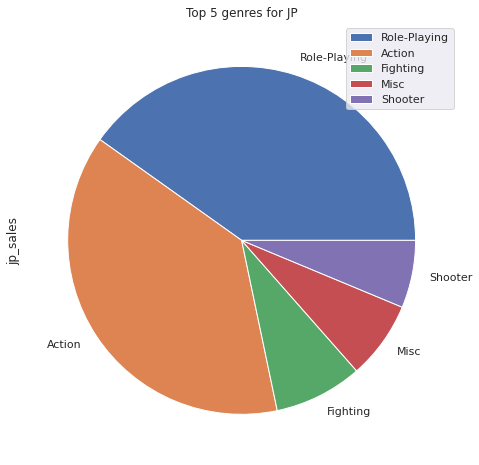

In [194]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    portrait_by_region_criteria(data_new, region, 'genre')
    plt.show()

В Северной Америке самым продаваемым жанром является Shooter, далее с небольшим отставанием следует жанр Action. В европейском регионе ситуация противоположная, небольшой перевес у жанра Action. В обоих регионах на 3 и 4 местах соответственно расположились Sports и Role-Playing игры.

В Японии и здесь ситуация сильно отличается. На первом месте расположился жанр Role-Playing, далее с незначительным отставанием следуют игры жанра Action. В пятёрку также входят Fighting, Misc и Shooter

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [195]:
data_new.groupby('rating').sum().pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.90,64.72


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Следствие ошибка, которая была допущена, при не заполнении пропусков в столбце "rating": на графиках не отобразились данные о играх без рейтинга, но продажи именно этих игр могут указать на ключевое различие в регионах или поменять пропорции. Стоит заполнить пропуски в столбце "rating", каким то смысловым маркером и пересчитать результаты, при необходимости поправив выводы.
</div>

<div class="alert alert-info">
<font size="5"><b>Ответ студента</b></font>

Исправлено, выводы исправлены.

Большое спасибо за весь фидбэк, много очень хороших советов
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍



</div>


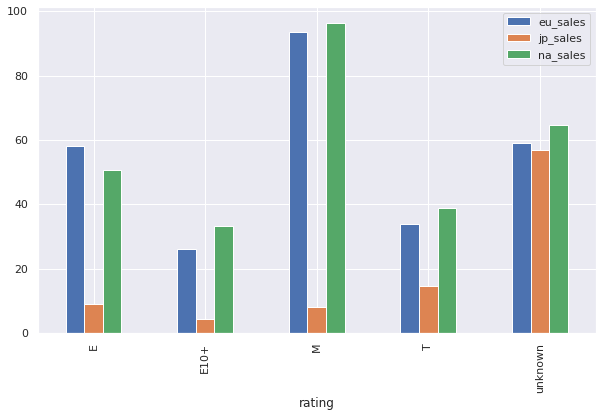

In [196]:
data_new.groupby('rating').sum().pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(kind='bar');

В европейских и североамериканских продажах наблюдаются схожие связи между рейтингом и уровнем продаж, за исключением наименее популярных рейтингов E10+ и T. Самыми продаваемыми играми в этих регионах являются игры с рейтингом M. Далее с почти в два раза меньшими значениями следуют игры без рейтинга, причём в данной категории уровни продаж практически совпадают для всех регионов, а для Японии игры этой категории являются самыми популярными. Чуть ниже в Северной Америке и Европе по количеству продаж расположились игры с рейтингом E.

В Японии предпочтения потребителей видеоигр сильно отличаются от европейских и североамериканских. В этой стране самыми продаваемыми являются игры без рейтинга. На втором месте, с сильно меньшими значениями, расположилась категория T. Далее с небольшой разницей между друг другом следуют игры с рейтингами E, M и E10+.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Япония на своей волне ) И жанры другие и платформы и доля играющих среди тинейджеров выше
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 

- Допустим мы хотим cделать группировку и вывести в процентах. Мы можем взять сумму (sum), среднюю (mean)...но чтобы сделать проценты, придётся поработать похитрее (схема):
    
        (df_current                     
        .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']]   
        .agg('sum')                                                
        .apply(lambda x: round(x / float(x.sum()), 2))     # вот это считает проценты        
        ).reset_index()     

    
Лямбда функция это очень просто, ты ведь знаешь про самописные функции? Так вот лямбда это "функция на лету", можно написать функцию, а можно лямбду, аналогии очевидны:
    
        def add_(x):
            return x+3

и аналог    

        lambda x: x+3 

Как видишь мы не создаем функцию, не присваиваем ей имя, не пишем return, мы просто быстренько сделали неименованную функцию - лямбду, потому что больше она нам не понадобиться, а аргумент x и там и там один и тот же и делаем мы с ним одно и тоже.      
  
    

- Рейтинги `E`, `T`, `K-A` итд  могут нам ничего не говорить,  тавай сделаем замену: E  ----->  Для всех, M ------>   17 лет итп. Обычно используют для этого словарь с заменами и .map (схема):



        ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех', 'unknown': 'Не известен',....}
        df_current['ESRB_description'] = df_current['rating'].map(ESRB_dict)







- Когда ты строишь несколько однотипных графика, то можно использовать [subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html). Это когда мы берем один "холст" на котором размещаем нужные нам графики рядом друг с другом. Это и визуально выглядит лучше и возможность строить однотипные графики в цикле. Тут бы это хорошо подошло.





Это не обязательное требование, если есть желание можешь попробовать что то реализовать, нет - я приму работу и так ;)


</div>

## Проверим гипотезы

### Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Пользовательский рейтинг (user_score) игр для платформы Xbox One = Пользовательский рейтинг (user_score) игр для платформы PC
H_a: Пользовательский рейтинг (user_score) игр для платформы Xbox One ≠ Пользовательский рейтинг (user_score) игр для платформы PC
alpha = 0.05
```

In [197]:
xone_user_scores = data_new.query('platform == "XOne"')['user_score']
pc_user_scores = data_new.query('platform == "PC"')['user_score']

results = st.ttest_ind(xone_user_scores, pc_user_scores, equal_var=False, nan_policy='omit')

alpha = 0.05

if results.pvalue < alpha:
    print(results.pvalue)
    print('Отвергаем нулевую гипотезу')
else:
    print(results.pvalue)
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:



Правильно:
 
+ сформулирована нулевая и альтернативные гипотезы

+ правильно выбрана статистика

+ метод 

+ equal_var=False


### Гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Пользовательский рейтинг (user_score) игр жанра "Action" = Пользовательский рейтинг (user_score) игр жанра "Sports"
H_a: Пользовательский рейтинг (user_score) игр жанра "Action" ≠ Пользовательский рейтинг (user_score) игр жанра "Sports"
alpha = 0.05
```

In [198]:
action_user_scores = data_new.query('genre == "Action"')['user_score']
sports_user_scores = data_new.query('genre == "Sports"')['user_score']

results = st.ttest_ind(action_user_scores, sports_user_scores, equal_var=False, nan_policy='omit')

alpha = 0.05

if results.pvalue < alpha:
    print(results.pvalue)
    print('Отвергаем нулевую гипотезу')
else:
    print(results.pvalue)
    print('Не получилось отвергнуть нулевую гипотезу')

1.182555038264477e-14
Отвергаем нулевую гипотезу


В обоих тестах гипотез был использован метод ttest_ind, т.к. проверялись на равенство средние выборок различных генеральных совокупностей. Также в обоих случаях был использован аргумент equal_var со значением False, т.к. нет оснований думать, что дисперсии одинаковые.
В качестве порогового значения P-value было выбрано 0.05, т.к. это один из стандартов.

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не исключается, т.к. не удалось отвергнуть нулевую гипотезу.


Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, возможно, корректна, т.к. по результатам теста мы отвергли нулевую гипотезу о том, что пользовательские рейтинги одинаковые.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Выводы точные, без глупостей: "подтвердили гипотезу..", "выяснили что рейтинги равны/неравны.." )

    
</div>



## Общий вывод

Было проведено исследование продаж видеоигр.
Была рассмотрена общая информация о представленных данных.
В столбцах с данными о продажах обнаружилась очень значительная скошенность вправо. Значения первого, второго и третьего квартиля, а также медианы, являются очень низкими и находятся достаточно близко друг к другу. В то время как максимальные значения продаж исчисляются десятками миллионов. Вероятно, некоторая небольшая часть от всех игр демонстрирует самый высокий уровень продаж. Аналогичное предположение можно сделать касательно платформ. Учитывая большое количество нулевых значений, можно предположить, что для некоторых платформ игры выпускались лишь в течение нескольких лет. 
Пропуски обнаружены в шести столбцах, в трёх столбцах ('Name', 'Year_of_Release' и 'Genre').
Полных дубликатов в данных не оказалось.

В процессе подготовки данных были проведены следующие действия:
Названия всех столбцов были приведены к нижнему регистру.
Столбец с годом выпуска (year_of_release) был приведён к типу int.
В столбце с пользовательскими оценками (user_score) значения "tbd" были заменены на NaN. Также был изменён тип данных с
object на float, т.к. данные в столбце user_score числовые.
Были удалены строки с пропусками в столбцах name, year_of_release и genre. Количество таких строк незначительно.
Был создан столбец total_sales, который включает в себя продажи во всех регионах. То есть total sales = na_sales + eu_sales + jp_sales + other_sales

Далее был проведён исследовательский анализ данных.
В данных представлен выпуск игр с 1980 по 2016 годы. С 1980 по 1991 годы количество выпускаемых игр было очень
низким. Затем с 1993 года начался резкий рост, который продолжался по 2009 год включительно. Пиковые значения выпущенных игр
приходятся на 2008 и 2009 годы с показателями около 1400 игр в год. Далее наблюдается спад до 2012 года. Затем в период с 2012 по 2016 годы количество выпускаемых игр менялось не так значительно, показатели составляют около 500 игр в год.

Самыми продаваемыми платформами за всё время являются PS2, Wii, X360 и PS. В пиковые годы под эти платформы было продано от 160 до 210 миллионов копий игр в год.

В среднем платформы существовали на рынке в течение 7 лет от их появления до ухода с рынка.

Далее был взят срез за наиболее актуальный период в данных - 2014-2016 годы.

В период с 2014 по 2016 годы на рынке продавались игры для 10 платформ. PS4 являлся абсолютным лидером по продажам с максимальным значением в 120 миллионов проданных копий в 2015 году. Второе место занимал XOne c максимальным значением в 60 миллионов проданных копий в 2015 году.

В целом можно сказать, с 2014 по 2016 годы наблюдается стабильный спад в продажах во всех платформах кроме PS4 и XOne. У этих платформ был рост продаж до 2015 года, но затем тоже начался очень сильный спад. Тем не менее, они сохранили значительный отрыв от своих конкурентов, поэтому можем их считать потенциально наиболее прибыльными.

При построении графика "ящик с усами" было обнаружено, что в каждой из трёх самых популярных платформ (PS4, XOne и 3DS) в объёме продаж очень много выбросов, и они очень сильно удалены даже от значения в 1.5 IQR вверх от третьего квартиля. Это говорит о том, что есть некоторая небольшая часть игр, которые становятся бестселлерами и имеют значительно превосходящие продажи, в то время как большая часть игр имеют намного более низкие объёмы продаж.

На втором графике были рассмотрены распределения продаж без выбросов. Было отмечено, что значения первого и второго (медианы) квартилей практически совпадают у платформ PS4 и XOne. Различие в значениях третьих квартилей так же незначительное, с небольшим перевесом у PS4. У платформы 3DS значения каждого квартиля значительно ниже, а также выбросы начинаются с гораздо более низких значений.

Далее были рассчитаны коэффициенты корреляции между оценками пользователей и уровнем продаж и оценками критиков и уровнем продаж для платформы PS4. В первом случае значение коэффициента оказалось близко к нулю, оно равно -0.04. Был сделан вывод, что связь отсутствует, оценки пользователей нельзя использовать для предсказания уровня продаж.
Коэффициент корреляции между оценками критиков и уровнем продаж равен 0.4. В данном случае можно говорить о наличии средней положительной корреляции.

По трём самым популярным платформам кроме PS4 коэффициенты корреляции также оказались близки к нулю. Однако у японской WiiU наблюдается другая картина - коэффициент корреляции составляет 0.41, что отображает среднюю положительную связь.

На основе имеющихся данных можно предположить, что в западном мире влияние пользовательских оценок практически отсутствует, в то время как в Японии оно вероятно имеет определённое значение.

В отличие от оценок пользователей, оценки критиков в каждой из топовых платформ имеют устойчивую среднюю корреляцию. Для платформы X360 коэффициент равен 0.53. В то время как у японской Wii он составляет 0.37, что является самым низким показателем среди представленных, но всё равно отражает некоторую связь между оценками критиков и продажами. Можно предположить, что для прогнозирования продаж лучше использовать оценки критиков как один из факторов.

Затем было рассмотрено общее распределение игр по жанрам. Больше всего игр было выпущено в жанре Action, более 600 игр за 3 года. Этот жанр является абсолютным лидером, все последующие жанры имеют значительно более низкие показатели. Второе место занимает жанр Role-Playing с чуть более 200-ми выпущенными играми, на третьем месте жанр Adventure с около 190 выпущенными играми.

Далее были рассчитаны медианные и средние продажи для каждого жанра. В обоих случаях картина достаточно схожая. Абсолютным лидером по прибыльными является жанр Shooter. Далее идут Sports, Platform и Fighting
Strategy, Puzzle и Adventure являются наименее прибыльными жанрами.

Далее был проведён анализ предпочтений покупателей в соответствии с регионом.

Самыми популярными платформами в европейском и североамериканском регионах является PS4, причём в Северной Америке количество проданных игр на PS4 не так сильно опережает продажи для XOne в процентном соотношении. В то время как в Европе  продажи игр для PS4 занимают больше половиныот всех продаж среди топ-5 платформ региона.

В Японии самой популярной платформой является 3DS, она составляет почти половину от всех продаж для топ-5 платформ. Далее следуют PS4, PSV и PS3 с сопоставимыми долями рынка. В данном регионе XOne не входит в топ 5 по продажам.

В Северной Америке самым продаваемым жанром является Shooter, далее с небольшим отставанием следует жанр Action. В европейском регионе ситуация противоположная, небольшой перевес у жанра Action. В обоих регионах на 3 и 4 местах соответственно расположились Sports и Role-Playing игры.

В Японии и здесь ситуация сильно отличается. На первом месте расположился жанр Role-Playing, далее с незначительным отставанием следуют игры жанра Action. В пятёрку также входят Fighting, Misc и Shooter

В европейских и североамериканских продажах наблюдаются схожие связи между рейтингом и уровнем продаж, за исключением наименее популярных рейтингов E10+ и T. Самыми продаваемыми играми в этих регионах являются игры с рейтингом M. Далее с почти в два раза меньшими значениями следуют игры без рейтинга, причём в данной категории уровни продаж практически совпадают для всех регионов, а для Японии игры этой категории являются самыми популярными. Чуть ниже в Северной Америке и Европе по количеству продаж расположились игры с рейтингом E.

В Японии предпочтения потребителей видеоигр сильно отличаются от европейских и североамериканских. В этой стране самыми продаваемыми являются игры без рейтинга. На втором месте, с сильно меньшими значениями, расположилась категория T. Далее с небольшой разницей между друг другом следуют игры с рейтингами E, M и E10+.

В конце исследования были проверены две гипотезы.

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не исключается, т.к. не удалось отвергнуть нулевую гипотезу.

Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, возможно, корректна, т.к. по результатам теста мы отвергли нулевую гипотезу о том, что пользовательские рейтинги одинаковые.

В обоих тестах гипотез был использован метод ttest_ind, т.к. проверялись на равенство средние выборок различных генеральных совокупностей. Также в обоих случаях был использован аргумент equal_var со значением False, т.к. нет оснований думать, что дисперсии одинаковые.
В качестве порогового значения P-value было выбрано 0.05, т.к. это один из стандартов.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Расписаны все этапы работы, есть конкретные рекомендации, и анализ с объяснением причин. Хороший, по делу, "без воды" вывод. Но после исправления красных комментариев выше, стоит ещё раз пробежать его взглядом. 
    
    
<div class="alert alert-warning">


Совет: 
    
    
- Я бы советовал структурировать общий вывод, разбив его на подразделы: работа с данными, ананлиз корреляций, проверка гипотез итд итп. Сейчас это просто большой кусок текста который трудно усвоить )



</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Самое большое впечатление от твоего проекта - старательность при выполнении работы над ним, не пожалел ни времени, ни усилий. Очень тщательный подход к очистке данных, бережное отношение к ним, буквально ничего не пропало. Все промежуточные и основные выводы сделаны, инструменты и методы модуля использованы оптимально. 



Ты умело применяешь графические библиотеки (matplotlib / seaborn), выбираешь для визуализации ровно те типы графиков, которые нужны, используешь и циклы для автоматизации. Оформление графиков очень аккуратное.



Денис, отмечаю уровень твоей программистской подготовки, - ты используешь продвинутые концепции языка Python и библиотеки pandas, всё это делает более читабельным твой код и одновременно показывает твой уровень владения инструментами.



Используешь циклы - верно, так код будет лаконичней и читабельней

Исопользование самописной функции - продолжай в том же духе, так твой код будет выглядеть красивей и компактней.





С комментированием кода тоже никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей.




Остались небольшие недоработки. Стоит доделать: 


- Не забываем хорошо начать - `вступление в работу` очень важно

- Дать обьяснение `возможным причинам` пропусков в данных.

- Заполнить пропуски в `rating`, чтобы получить корректный результат при анализе влияния `rating` на продажи. 

- Связь продаж и отзывов соотнеси на `5 - 6` платформ , так выводы станут весомее.


Уверен, тебе не составит большого труда внести исправления. Жду их, для принятия проекта. Удачи 😀

</div>



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!  Она у тебя с минимальными недочетами была.  


Красного нет, вопросов нет, значит все, пора принимать) Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

  
Отличная работа Денис. Желаю успехов в дальнейшей учебе!




</div>